# Desafío - Boosting Classifiers

Descripción

Para esta sesión trabajaremos con una base de datos sobre rotación de clientes en una compañia de telecomunicaciones. El archivo contiene 3333 registros y 20 atributos. El vector objetivo a modelar esla tasa de rotación entre los clientes de una compañia de telecomunicaciones churn. 

Los atributosexistentes hacen referencia a características de la cuenta de cada cliente.

Lista de atributos:

* State: Estado de Estados Unidos
* Account Length: Tiempo en que la cuenta ha sido activada
* Area Code: código de área.
* international plan: Plan internacional activado
* voice mail plan: Plan de mensajes de voz activado
* number_vmail_messages: Cantidad de mensajes de voz.
* total_day_minutes: Cantidad de minutos ocupados en la mañana.
* total_day_calls: Cantidad de llamadas realizadas en la mañana.
* total_day_charge: Cobros realizados en la mañana.
* total_eve_minutes: Cantidad de minutos ocupados en la tarde.
* total_eve_calls: Cantidad de llamadas realizadas en la tarde.
* total_eve_charge: Cobros realizados en la tarde.
* total_night_calls: Cantidad de llamadas realizadas en la noche.
* tota_night_minutes: Cantidad de minutos ocupados en la noche.
* total_night_charge: Cobros realizados en la noche.
* total_intl_minutes: Cantidad de minutos ocupados en llamadas internacionales.
* total_intl_calls: Cantidad de llamadas internacionales realizadas.
* total_intl_charge: Cobros realizados por llamadas internacionales.
* churn: 1 si el cliente se cambió de compañia, 0 de los contrario.

Los datos provienen del paquete AppliedPreditiveModeling de R.

## Ejercicio 1: 

Preprocesamiento Grafique el comportamiento distributivo de los atributos y de la variable dependiente. Reporte brevemente el comportamiento de las variables.En  base al  comportamiento de  los  atributos,  considere si  es  necesario implementar  alguna recodificación o transformación de atributo. Algunas normas a seguir:Para las variables categóricas, recodifíquelas en variables binarias.Para aquellas variables numéricas que presenten alto sesgo, pueden transformarlas con su logaritmo

In [101]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelBinarizer

In [52]:
df = pd.read_csv('churn_train.csv').drop(columns='Unnamed: 0')

In [53]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [54]:
df.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

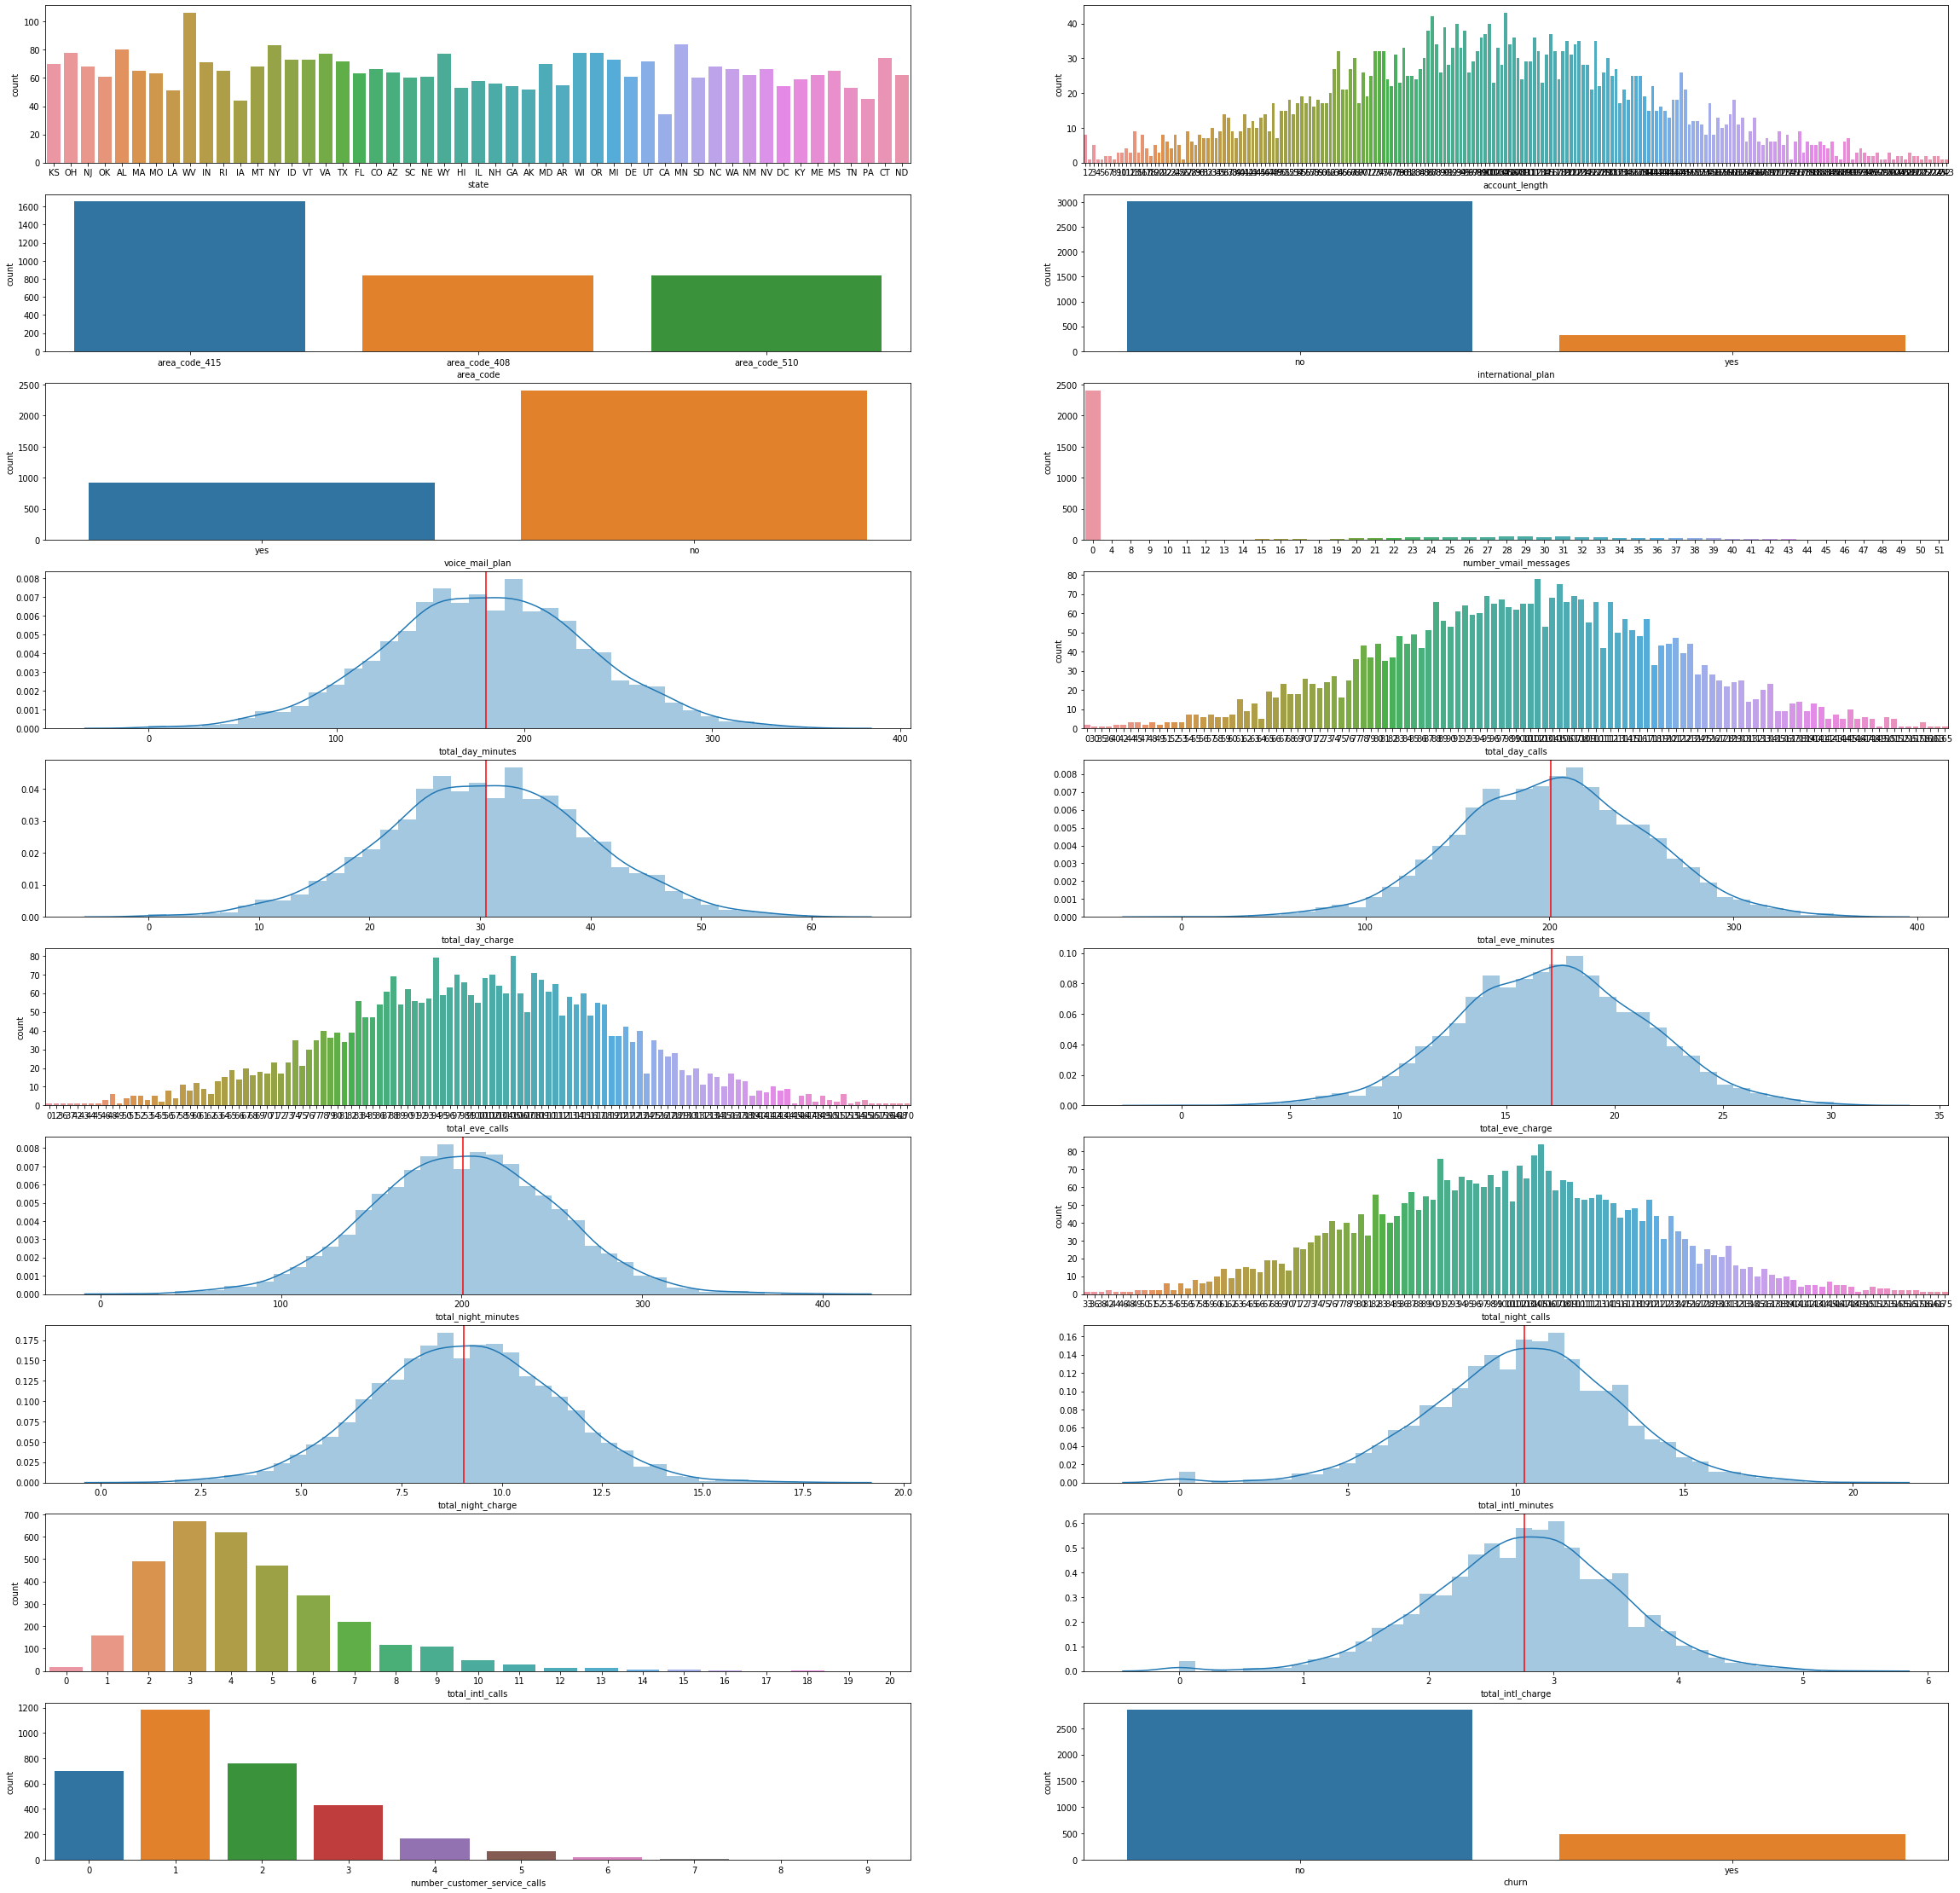

In [55]:
plt.figure(figsize=(40, 40))
j=1
for i in df.columns:
    plt.subplot(df.shape[1]/2,2,j);
    if np.dtype(df[i])== 'float64':
        sns.distplot(df[i])
        plt.axvline(np.mean(df[i]),color='r')
    else:
        sns.countplot(x=i,data=df)
    j=j+1

Reporte brevemente el comportamiento de las variables

Se presenta un desbalance en las categorías de las clases churn, voice_mail_plan, international_plant. Por otro lado las vemos que las demás variables presentan un comportamiento continuo que se asemeja a una distribución normal. Para el caso de las variables enteras se ve una tendencía de la curva hacía la derecha, pero no se aplicara logaritmo debido a la presencia de valores 0.  Para el caso de State no se encuentra una variable predominante sobre las demás.

In [77]:
lb=LabelBinarizer()

In [78]:
df_train=df

In [86]:
encoder_state=lb.fit(df['state'])
df_train=pd.concat( [df.drop(columns='state'), pd.DataFrame(encoder_state.transform(df_train['state']),
                                                           columns=encoder_state.classes_)], axis=1)


In [87]:
encoder_area_code=lb.fit(df['area_code'])
df_train=pd.concat( [df.drop(columns='area_code'), pd.DataFrame(encoder_area_code.transform(df_train['area_code']),
                                                           columns=encoder_area_code.classes_)], axis=1)

In [88]:
encoder_international_plan=lb.fit(df['international_plan'])
df_train['international_plan']=encoder_international_plan.transform(df['international_plan'])

In [89]:
encoder_international_plan=lb.fit(df['international_plan'])
df_train['international_plan']=encoder_international_plan.transform(df['international_plan'])

In [90]:
encoder_voice_mail_plan=lb.fit(df['voice_mail_plan'])
df_train['voice_mail_plan']=encoder_voice_mail_plan.transform(df['voice_mail_plan'])

In [91]:
encoder_churn=lb.fit(df['churn'])
df_train['churn']=encoder_churn.transform(df['churn'])


In [93]:
df_train=df_train.drop(columns='state')

In [99]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 3333 non-null   int64  
 1   international_plan             3333 non-null   int32  
 2   voice_mail_plan                3333 non-null   int32  
 3   number_vmail_messages          3333 non-null   int64  
 4   total_day_minutes              3333 non-null   float64
 5   total_day_calls                3333 non-null   int64  
 6   total_day_charge               3333 non-null   float64
 7   total_eve_minutes              3333 non-null   float64
 8   total_eve_calls                3333 non-null   int64  
 9   total_eve_charge               3333 non-null   float64
 10  total_night_minutes            3333 non-null   float64
 11  total_night_calls              3333 non-null   int64  
 12  total_night_charge             3333 non-null   f

## Ejercicio 2: 

Comparación de AdaBoost y Gradient Boosting. 

Entrene los clasificadores AdaBoost y Gradient Boosting para mejorar su capacidad predictiva en la medida de lo posible. Para ello, implemente una búsqueda de grilla con las siguientes especificaciones:

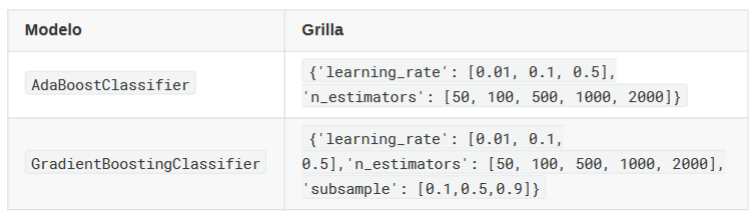



Si el tiempo de computación es alto, puede implementar la búsqueda con 1 validación cruzada.Reporte las métricas para los mejores modelos

In [103]:
X_train= df_train.drop(columns='churn')
y_train=df_train['churn']

In [114]:
param_grid1 = {'n_estimators': [50, 100, 500, 1000, 2000],
              'learning_rate': [0.01, 0.1, 0.5],
              }
abc_grid = GridSearchCV(AdaBoostClassifier(),
                       param_grid = param_grid1, 
                       cv=5, n_jobs=-1).fit(X_train, y_train)

In [115]:
param_grid2 = {'n_estimators': [50, 100, 500, 1000, 2000],
              'learning_rate': [0.01, 0.1,0.5],
              'subsample': [0.1,0.5,0.9]
              }
Gdc_grid = GridSearchCV(GradientBoostingClassifier(),
                       param_grid = param_grid2, 
                       cv=5, n_jobs=-1).fit(X_train, y_train)

In [116]:
abc_grid.best_score_

0.8772919846383115

In [117]:
Gdc_grid.best_score_

0.9576954765860313

El valor medio de las validaciones cruzadas es más alto para el GradientBoostingClassifier() lo que significa que tenemos un mejor ajuste del modelo para predecir las clases ( Si se fuga o no el cliente).

# Ejercicio 3: Principales factores asociados
- Con el mejor modelo, reporte la importancia relativa de los atributos y comente cuáles son los que aumentan la probabilidad de fuga en los clientes.
- tip: Pueden implementar la función plot_importance que se encuentra en la lectura de Bagging y Random Forest.

In [118]:
def plot_importance(fit_model, feat_names):
    """TODO: Docstring for plot_importance.

    :fit_model: TODO
    :: TODO
    :returns: TODO

    """
    tmp_importance = fit_model.feature_importances_
    sort_importance = np.argsort(tmp_importance)[::-1]
    names = [feat_names[i] for i in sort_importance]
    plt.title("Feature importance")
    plt.barh(range(len(feat_names)), tmp_importance[sort_importance])
    plt.yticks(range(len(feat_names)), names, rotation=0)

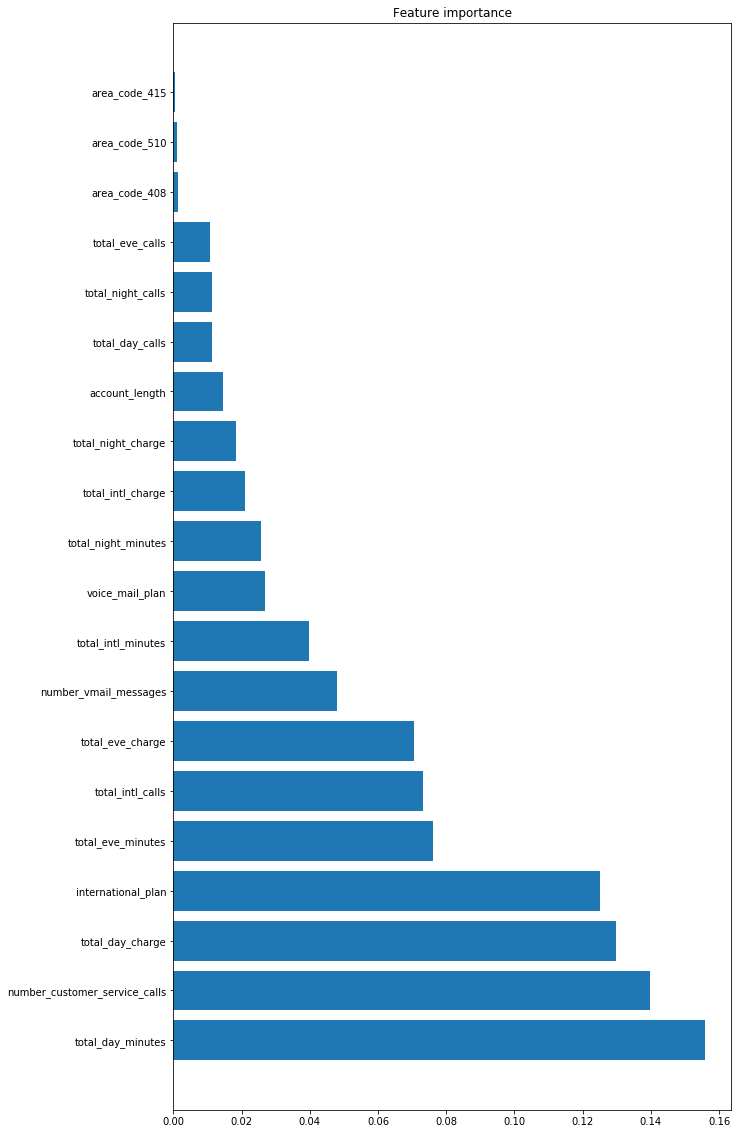

In [119]:
plt.figure(figsize=(10,20))
plot_importance(Gdc_grid.best_estimator_,X_train.columns)